## Importing the Libraries

In [186]:
import os
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [187]:
# Running pre-processing file
%run directory.ipynb

## Defining Training Images

In [188]:
img_height = 64
img_width = 64
batch_size = 4
nb_epochs = 50

In [189]:
TRAINING_DIR = "tmp"

train_datagen = ImageDataGenerator(
                rescale = 1/255.0,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=False,
                validation_split=0.2)
                
train_set = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

Found 2728 images belonging to 62 classes.


## Defining Validation Images

In [190]:
validation_set = train_datagen.flow_from_directory(
    TRAINING_DIR, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 682 images belonging to 62 classes.


## Designing Model

In [191]:
model = tf.keras.models.Sequential([
  
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape = (img_height, img_width, 3)),
    #tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=62, activation='softmax')])
    #tf.keras.layers.Flatten()

In [192]:
model.compile(optimizer='adam', loss = tf.keras.losses.CategoricalCrossentropy(), metrics= tf.keras.metrics.CategoricalAccuracy())

In [193]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_84 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_74 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 12, 12, 64)      

## Fitting on Model

In [194]:
history = model.fit_generator(
    train_set,
    steps_per_epoch = train_set.samples // batch_size,
    validation_data = validation_set, 
    validation_steps = validation_set.samples // batch_size,
    epochs = nb_epochs)

Epoch 1/50
682/682 [==============================] - 26s 38ms/step - loss: 4.0392 - categorical_accuracy: 0.0389 - val_loss: 3.4872 - val_categorical_accuracy: 0.1338
Epoch 2/50
682/682 [==============================] - 26s 38ms/step - loss: 2.8393 - categorical_accuracy: 0.2566 - val_loss: 2.2975 - val_categorical_accuracy: 0.4147
Epoch 3/50
682/682 [==============================] - 26s 38ms/step - loss: 1.8793 - categorical_accuracy: 0.4652 - val_loss: 1.7935 - val_categorical_accuracy: 0.5368
Epoch 4/50
682/682 [==============================] - 26s 38ms/step - loss: 1.4322 - categorical_accuracy: 0.5916 - val_loss: 1.5972 - val_categorical_accuracy: 0.6162
Epoch 5/50
682/682 [==============================] - 26s 38ms/step - loss: 1.2467 - categorical_accuracy: 0.6140 - val_loss: 1.4206 - val_categorical_accuracy: 0.6324
Epoch 6/50
682/682 [==============================] - 27s 39ms/step - loss: 1.0389 - categorical_accuracy: 0.6859 - val_loss: 1.3527 - val_categorical_accuracy:

## Saving Model for future use

In [198]:
model.save_weights('./checkpoints/my_checkpoint')

In [201]:
model.save('./savedmodel')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./savedmodel\assets


## Plotting the result

Text(0.5, 1.0, 'Training and validation loss')

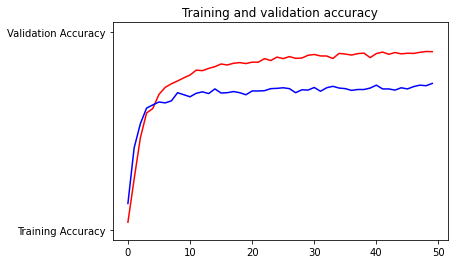

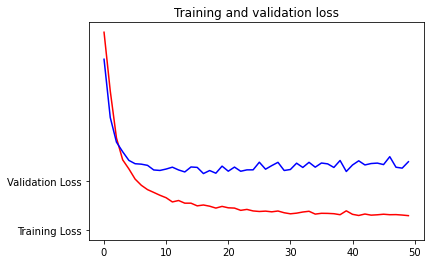

In [197]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

## Evaluating accuracy

In [208]:
STEP_SIZE_TEST = validation_set.samples // batch_size
loss, acc = model.evaluate_generator(generator=validation_set, steps=STEP_SIZE_TEST)

In [218]:
print('The model has accuracy of: {:.4} %'.format(acc*100))

The model has accuracy of: 71.76 %
